Penguins 1. & 2.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


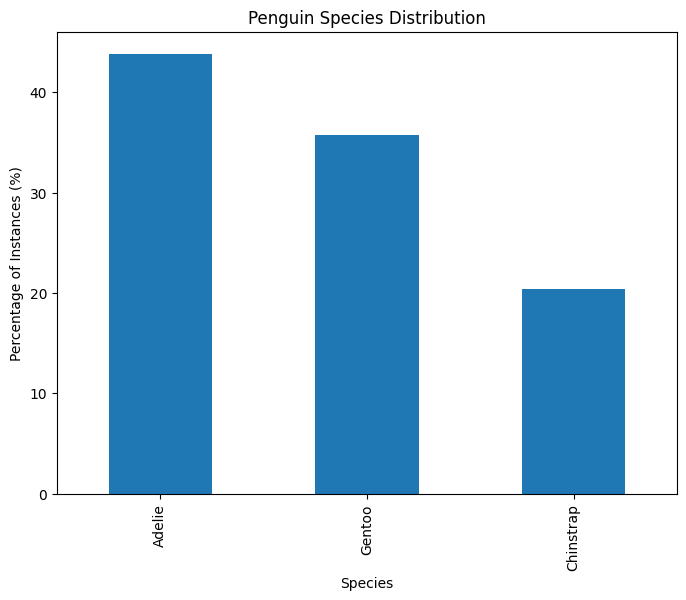

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

pengPerf = open("penguin-performance.txt", "w") #CHANGE TO 'a', HAVE 'w' FOR TESTING
abalPerf = open("abalone-performance.txt", "w")

# Penguin dataset
penguin_data = pd.read_csv('/content/penguins.csv')

# (1-i) Convert 'island' and 'sex' to numerical format using OneHotEncoder for the Penguin dataset
encoder = OneHotEncoder(sparse=False)
penguin_encoded = encoder.fit_transform(penguin_data[['island', 'sex']])
penguin_encoded_df = pd.DataFrame(penguin_encoded, columns=encoder.get_feature_names_out(['island', 'sex']))


# (1-ii) Concatenate the encoded DataFrame with the original one and drop the original 'island' and 'sex' columns
penguin_data = pd.concat([penguin_data.drop(['island', 'sex'], axis=1), penguin_encoded_df], axis=1)


# Abalone dataset
abalone_data = pd.read_csv('/content/abalone.csv')


# Plot the percentage of instances for Penguins
class_counts = penguin_data['species'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Penguin Species Distribution')
plt.xlabel('Species')
plt.ylabel('Percentage of Instances (%)')
plt.savefig('penguin-classes.png', format='png')
plt.show()






Abalone 1. & 2.

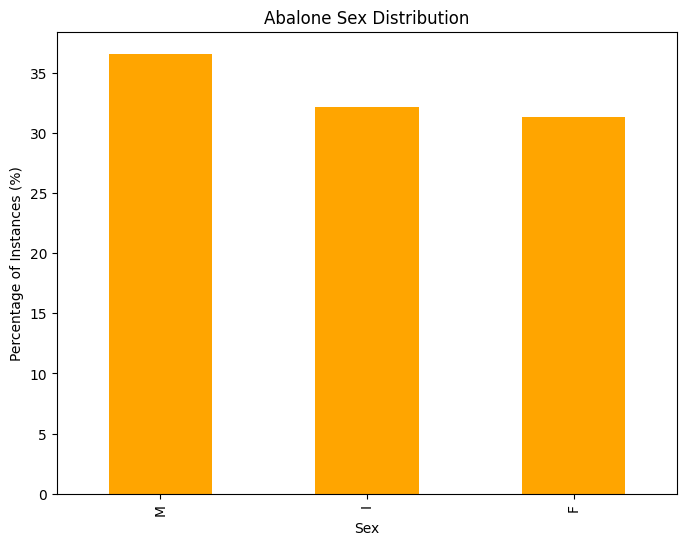

In [ ]:
# Plot the percentage of instances for Abalones
abalone_class_counts = abalone_data['Type'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
abalone_class_counts.plot(kind='bar', color='orange')
plt.title('Abalone Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Percentage of Instances (%)')
plt.savefig('abalone-classes.png', format='png')
plt.show()


Penguin and Abalone 3.

In [ ]:
# Split the datasets

#penguin
penguin_features = penguin_data.drop('species', axis=1)  # 'species'
penguin_target = penguin_data['species']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(penguin_features, penguin_target)


# abalone
abalone_features = abalone_data.drop('Type', axis=1)
abalone_target = abalone_data['Type']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(abalone_features, abalone_target)


Penguin 4.(a)

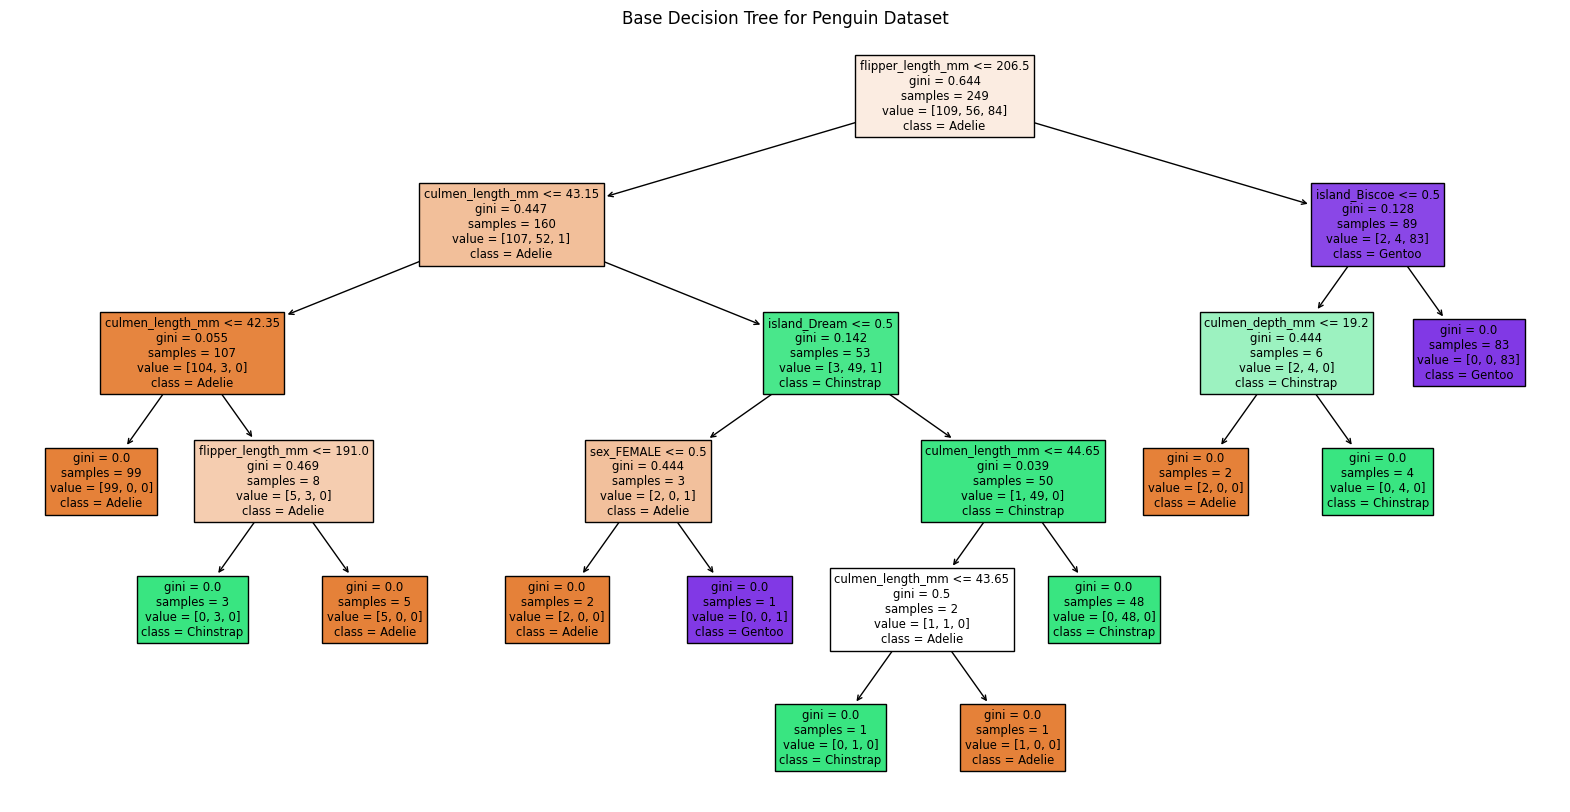

Accuracy for Base-DT (Penguin): 96.43 %


In [ ]:
# Train Base-DT for the Penguin dataset with default parameters
clf_p_base = DecisionTreeClassifier()
clf_p_base.fit(X_train_p, y_train_p)

# Visualize the decision tree for the Penguin dataset
plt.figure(figsize=(20,10))
plot_tree(clf_p_base, filled=True, feature_names=X_train_p.columns.tolist(), class_names=np.unique(y_train_p).tolist())
plt.title('Base Decision Tree for Penguin Dataset')
plt.show()


# Check accuracy for the Penguin dataset
accuracy_p_base = clf_p_base.score(X_test_p, y_test_p)
print("Accuracy for Base-DT (Penguin): %.2f %%" % (accuracy_p_base*100))




Abalone 4.(a)

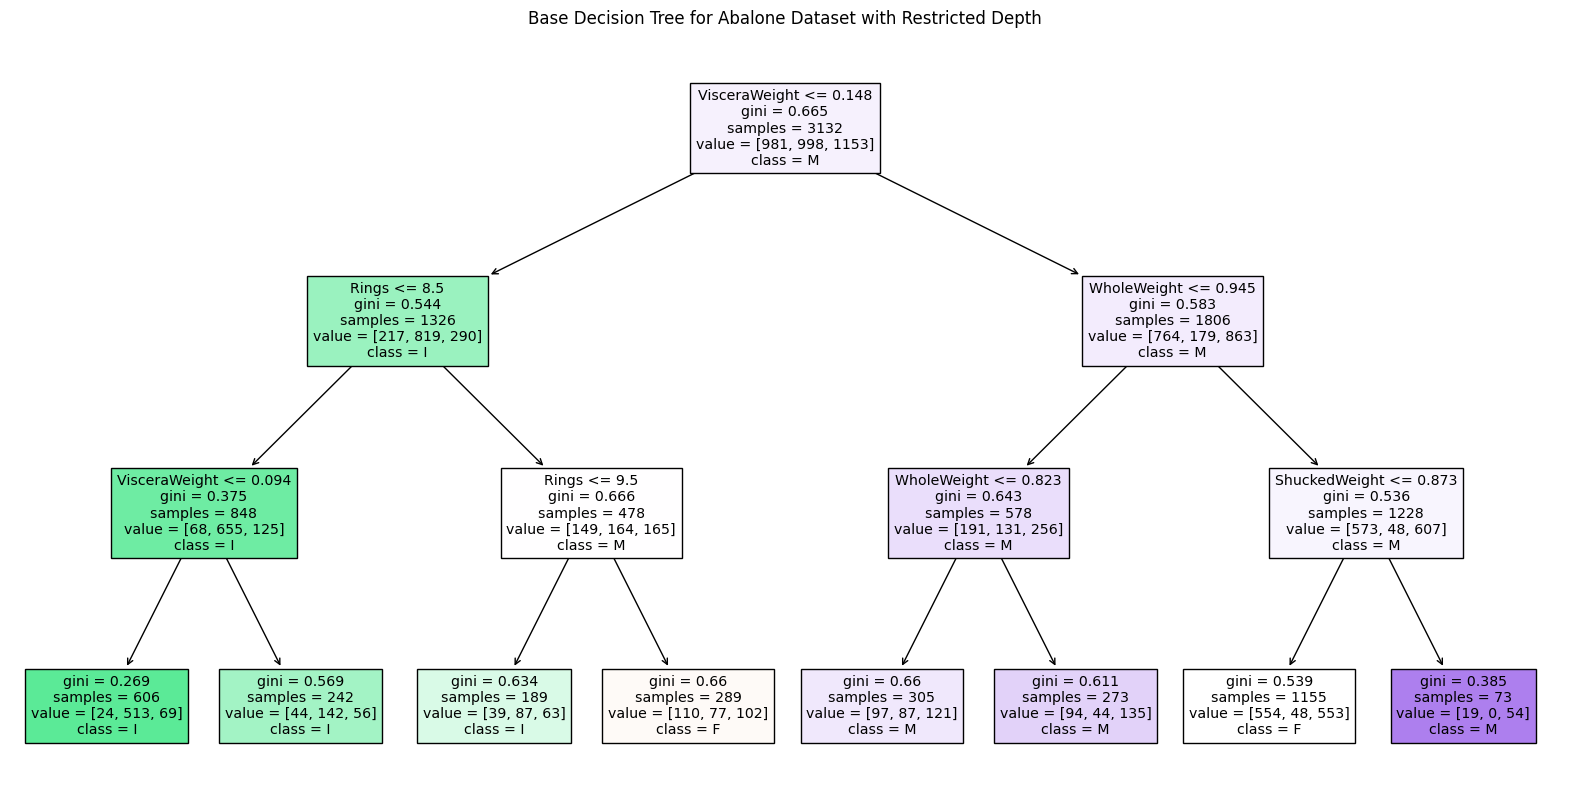

Accuracy for Base-DT with restricted depth (Abalone): 55.69 %


In [ ]:
# Train Base-DT for the Abalone dataset
# max_depth=3 for visualization

clf_a_base = DecisionTreeClassifier(max_depth=3)
clf_a_base.fit(X_train_a, y_train_a)

# Tree
plt.figure(figsize=(20,10))
plot_tree(clf_a_base, filled=True, feature_names=X_train_a.columns.tolist(), class_names=np.unique(y_train_a).tolist())
plt.title('Base Decision Tree for Abalone Dataset with Restricted Depth')
plt.show()

# Check accuracy
accuracy_a_base = clf_a_base.score(X_test_a, y_test_a)
print("Accuracy for Base-DT with restricted depth (Abalone): %.2f %%" % (accuracy_a_base*100))


Penguin and Abalone 4.(b)

Penguins - Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Penguins - Best cross-validated score: 98.40 %
Abalones - Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
Abalones - Best cross-validated score: 51.92 %


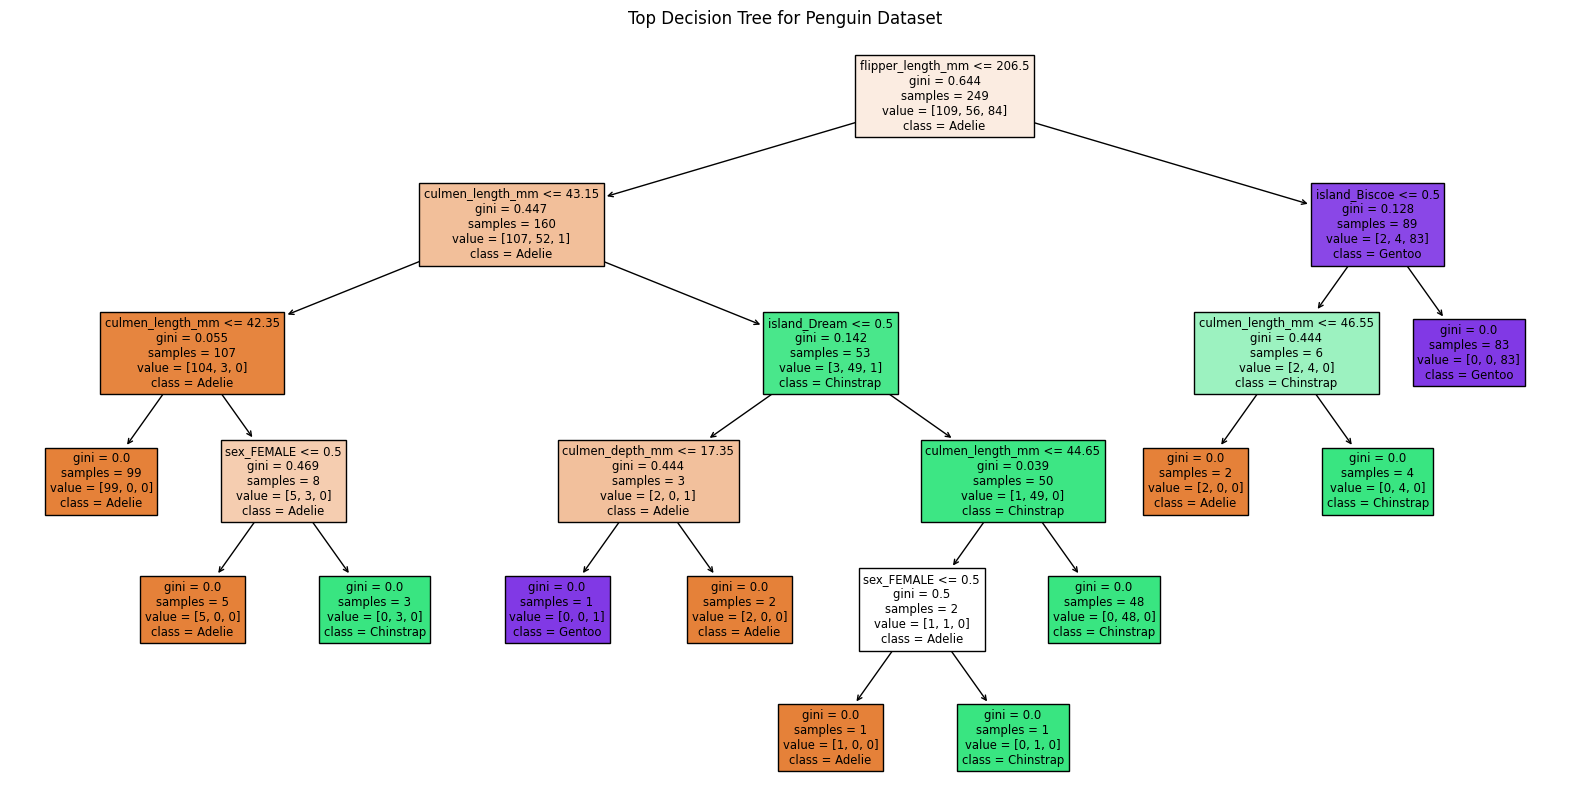

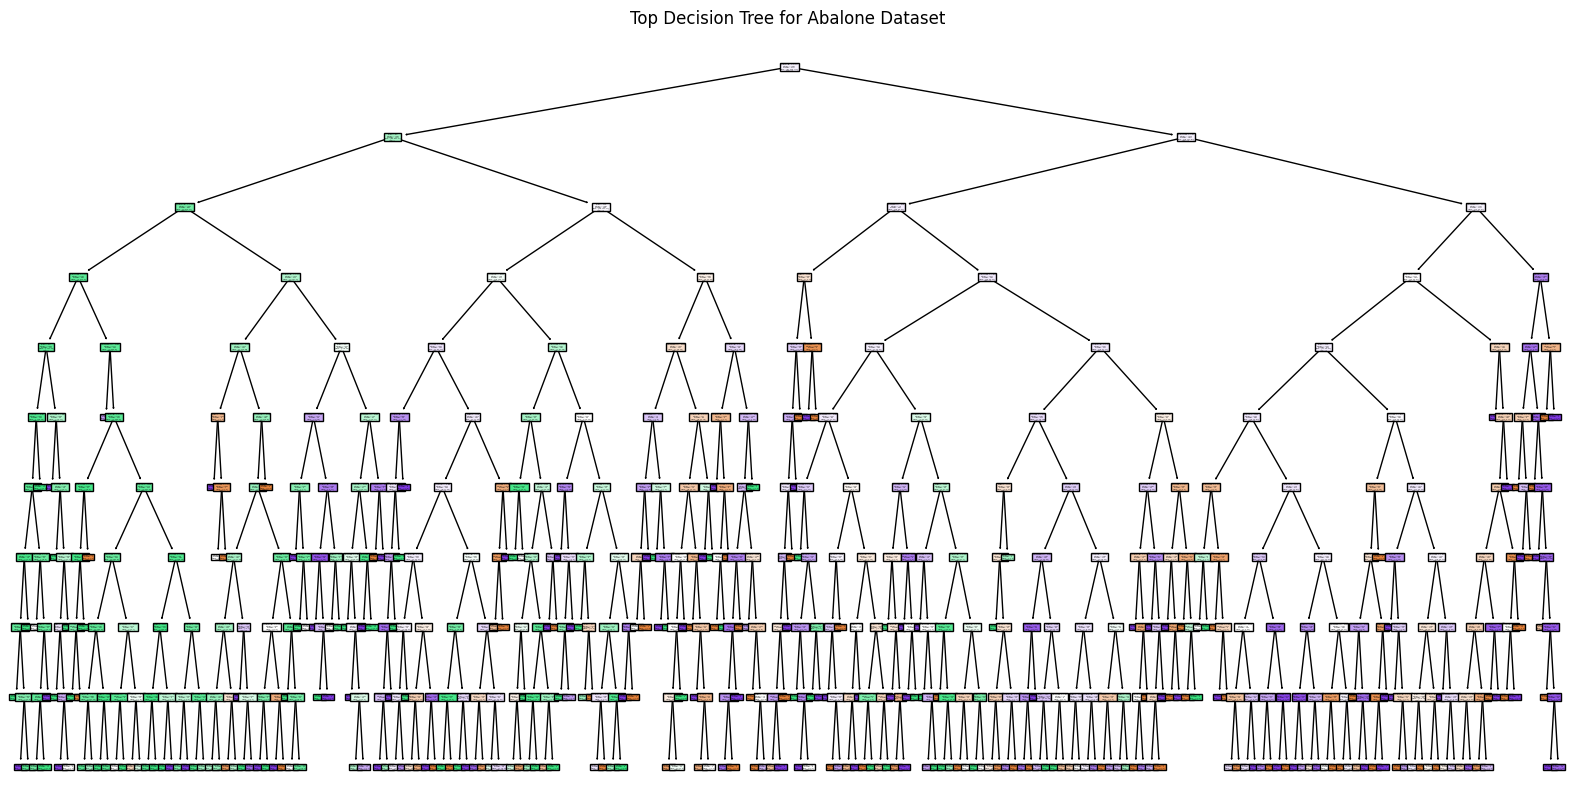

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],  # Replaceable
    'min_samples_split': [2, 4, 6]  # Replaceable
}

# Initialize the classifier
dt = DecisionTreeClassifier()

# Initialize the GridSearchCV object for penguins
grid_search_p = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# grid search on the Penguin dataset
grid_search_p.fit(X_train_p, y_train_p)

# GridSearchCV object for abalones
grid_search_a = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# grid search on the Abalone dataset
grid_search_a.fit(X_train_a, y_train_a)


print(f"Penguins - Best parameters: {grid_search_p.best_params_}")
print("Penguins - Best cross-validated score: %.2f %%" % (grid_search_p.best_score_*100))


print(f"Abalones - Best parameters: {grid_search_a.best_params_}")
print("Abalones - Best cross-validated score: %.2f %%" % (grid_search_a.best_score_*100))

# Retrieve the best Decision Tree models from grid_search
top_dt_penguin = grid_search_p.best_estimator_
top_dt_abalone = grid_search_a.best_estimator_

# top performing Decision Tree model for Penguins
plt.figure(figsize=(20,10))
plot_tree(top_dt_penguin, filled=True, feature_names=X_train_p.columns.tolist(), class_names=np.unique(y_train_p).tolist())
plt.title('Top Decision Tree for Penguin Dataset')
plt.show()

# top performing Decision Tree model for Abalones
plt.figure(figsize=(20,10))
plot_tree(top_dt_abalone, filled=True, feature_names=X_train_a.columns.tolist(), class_names=np.unique(y_train_a).tolist())
plt.title('Top Decision Tree for Abalone Dataset')
plt.show()


Original Best Parameters for Abalone: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}


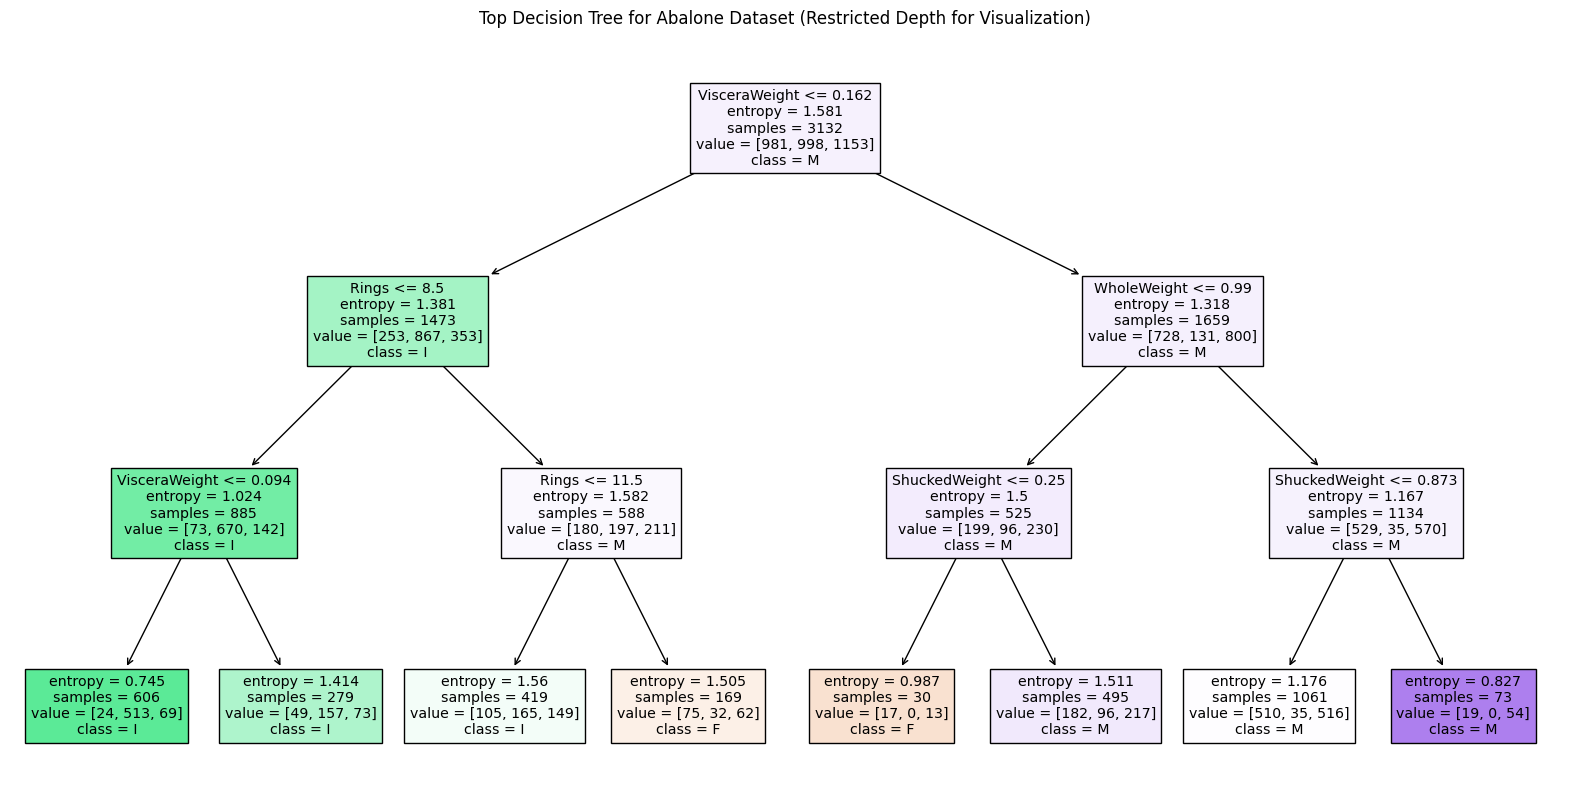

In [ ]:
# for the abalone dataset (restricted tree depth)

# Retrieve the best parameters for the Abalone dataset and override the max_depth
best_params_abalone = grid_search_a.best_params_
print(f"Original Best Parameters for Abalone: {best_params_abalone}")

# max depth =3 (Changeable)
visualization_max_depth = 3
best_params_abalone['max_depth'] = visualization_max_depth

# Train a new Decision Tree
top_dt_abalone_visual = DecisionTreeClassifier(**best_params_abalone)
top_dt_abalone_visual.fit(X_train_a, y_train_a)

# restricted depth for Abalone
plt.figure(figsize=(20,10))
plot_tree(top_dt_abalone_visual, filled=True, feature_names=X_train_a.columns.tolist(), class_names=np.unique(y_train_a).tolist())
plt.title('Top Decision Tree for Abalone Dataset (Restricted Depth for Visualization)')
plt.show()


Penguin and Abalone 4.(c)

In [ ]:
#Base MLP for penguin Dataset
base_mlp_p = MLPClassifier(hidden_layer_sizes=(100,100,), activation="logistic", solver="sgd")
base_mlp_p.fit(X_train_p, y_train_p)


#Base MLP for abalone dataset
base_mlp_a = MLPClassifier(hidden_layer_sizes=(100,100,), activation="logistic", solver="sgd")
base_mlp_a.fit(X_train_a, y_train_a)

accuracy_p_mlpbase = base_mlp_p.score(X_test_p, y_test_p)
accuracy_a_mlpbase = base_mlp_a.score(X_test_a, y_test_a)

print("Accuracy for Base-MLP (Penguin): %.2f %%" % (accuracy_p_mlpbase*100))
print("Accuracy for Base-MLP (Abalone): %.2f %%" % (accuracy_a_mlpbase*100))


Accuracy for Base-MLP (Penguin): 44.05 %
Accuracy for Base-MLP (Abalone): 50.14 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Penguin and Abalone 4.(d)

In [ ]:
#Top MLP for both datasets

mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(50,30,), (30,30,30,)],
    'solver': ['adam', 'sgd']
}
mlp = MLPClassifier()

grid_search_mlp_p = GridSearchCV(mlp, mlp_param_grid, cv=5, scoring='accuracy')

grid_search_mlp_p.fit(X_train_p, y_train_p)

grid_search_mlp_a = GridSearchCV(mlp, mlp_param_grid, cv=5, scoring='accuracy')

grid_search_mlp_a.fit(X_train_a, y_train_a)

print(f"Penguins MLP - Best parameters: {grid_search_mlp_p.best_params_}")
print("Penguins MLP - Best cross-validated score: %.2f %%" % (grid_search_mlp_p.best_score_*100))

print(f"Abalone MLP - Best parameters: {grid_search_mlp_a.best_params_}")
print("Abalone MLP - Best cross-validated score: %.2f %%" % (grid_search_mlp_a.best_score_*100))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Penguins MLP - Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam'}
Penguins MLP - Best cross-validated score: 49.90 %
Abalone MLP - Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam'}
Abalone MLP - Best cross-validated score: 56.10 %


Penguin and Abalone 5.

In [ ]:
#penguin trackers
Penguin_Accuracy_Array1 = np.array([1])
Penguin_F1_Macro_Array1 = np.array([1])
Penguin_F1_Weight_Array1 = np.array([1])
Penguin_Accuracy_Array2 = np.array([1])
Penguin_F1_Macro_Array2 = np.array([1])
Penguin_F1_Weight_Array2 = np.array([1])
Penguin_Accuracy_Array3 = np.array([1])
Penguin_F1_Macro_Array3 = np.array([1])
Penguin_F1_Weight_Array3 = np.array([1])
Penguin_Accuracy_Array4 = np.array([1])
Penguin_F1_Macro_Array4 = np.array([1])
Penguin_F1_Weight_Array4 = np.array([1])

#Abalone trackers
Abalone_Accuracy_Array1 = np.array([1])
Abalone_F1_Macro_Array1 = np.array([1])
Abalone_F1_Weight_Array1 = np.array([1])
Abalone_Accuracy_Array2 = np.array([1])
Abalone_F1_Macro_Array2 = np.array([1])
Abalone_F1_Weight_Array2 = np.array([1])
Abalone_Accuracy_Array3 = np.array([1])
Abalone_F1_Macro_Array3 = np.array([1])
Abalone_F1_Weight_Array3 = np.array([1])
Abalone_Accuracy_Array4 = np.array([1])
Abalone_F1_Macro_Array4 = np.array([1])
Abalone_F1_Weight_Array4 = np.array([1])

Penguin and Abalone Models Test Predictions

In [ ]:
#creating the prdict for file writing (confusion matrix, etc.)
  #penguin
predP = clf_p_base.predict(X_test_p)
predP_2 = grid_search_p.predict(X_test_p)
predP_3 = base_mlp_p.predict(X_test_p)
predP_4 = grid_search_mlp_p.predict(X_test_p)

  #abalone
predA = clf_a_base.predict(X_test_a)
predA_2 = grid_search_a.predict(X_test_a)
predA_3 = base_mlp_a.predict(X_test_a)
predA_4 = grid_search_mlp_a.predict(X_test_a)

Penguin 5. (A)-(D)

In [ ]:
# 6 (Penguin)
pengPerf.write("**********************" + "\nPenguin Base-DT\n")

#confusion matrix
pengPerf.write("\nConfusion Matrix:\n")
pengPerf.write(str(confusion_matrix(predP, y_test_p))  + "\n\n")
pengPerf.write(str((classification_report(predP, y_test_p)))+"\n")
# 6
pengPerf.write("\nAccuracy for Base-DT (Penguin): %.2f %%" % (accuracy_p_base*100))
Penguin_Accuracy_Array1 = np.append(Penguin_Accuracy_Array1, [accuracy_p_base])
f1Macro = f1_score(predP, y_test_p, average = "macro")
Penguin_F1_Macro_Array1 = np.append(Penguin_F1_Macro_Array1, [f1Macro])
pengPerf.write("\nAverage macro-average for Base-DT (Penguin): %.2f %%" % (f1Macro*100))
f1Weight = f1_score(predP, y_test_p, average = "weighted")
Penguin_F1_Weight_Array1 = np.append(Penguin_F1_Weight_Array1, [f1Weight])
pengPerf.write("\nAverage macro-average for Base-DT (Penguin): %.2f %%" % (f1Weight*100) + "\n")



pengPerf.write("\n\n**********************" + "\nPenguin Top-DT\n")
pengPerf.write(f"Penguins - Best parameters: {grid_search_p.best_params_}")
#confusion matrix
pengPerf.write("\nConfusion Matrix:\n")
pengPerf.write(str(confusion_matrix(predP_2, y_test_p))+"\n\n")
pengPerf.write(str((classification_report(predP_2, y_test_p)))+"\n")
# 6
pengPerf.write("\nAccuracy for Top-DT (Penguin): %.2f %%" % (grid_search_p.best_score_*100))
Penguin_Accuracy_Array2 = np.append(Penguin_Accuracy_Array2, [grid_search_p.best_score_])
f1Macro_2 = f1_score(predP_2, y_test_p, average = "macro")
Penguin_F1_Macro_Array2 = np.append(Penguin_F1_Macro_Array2, [f1Macro_2])
pengPerf.write("\nAverage macro-average for Top-DT (Penguin): %.2f %%" % (f1Macro_2*100))
f1Weight_2 = f1_score(predP_2, y_test_p, average = "weighted")
Penguin_F1_Weight_Array2 = np.append(Penguin_F1_Weight_Array2, [f1Weight_2])
pengPerf.write("\nAverage macro-average for Top-DT (Penguin): %.2f %%" % (f1Weight_2*100)+ "\n")


pengPerf.write("\n\n**********************" + "\nPenguin Base-MLP\n")

#confusion matrix
pengPerf.write("\nConfusion Matrix:\n")
pengPerf.write(str(confusion_matrix(predP_3, y_test_p))+"\n\n")
pengPerf.write(str((classification_report(predP_3, y_test_p)))+"\n")
# 6
pengPerf.write("\nAccuracy for Base-MLP (Penguin): %.2f %%" % (accuracy_p_mlpbase*100))
Penguin_Accuracy_Array3 = np.append(Penguin_Accuracy_Array3, [accuracy_p_mlpbase])
f1Macro_3 = f1_score(predP_3, y_test_p, average = "macro")
Penguin_F1_Macro_Array3 = np.append(Penguin_F1_Macro_Array3, [f1Macro_3])
pengPerf.write("\nAverage macro-average for Base-MLP (Penguin): %.2f %%" % (f1Macro_3*100))
f1Weight_3 = f1_score(predP_3, y_test_p, average = "weighted")
Penguin_F1_Weight_Array3 = np.append(Penguin_F1_Weight_Array3, [f1Weight_3])
pengPerf.write("\nAverage macro-average for Base-MLP (Penguin): %.2f %%" % (f1Weight_3*100)+ "\n")


pengPerf.write("\n\n**********************" + "\nPenguin Top-MLP\n")
pengPerf.write(f"Penguins MLP - Best parameters: {grid_search_mlp_p.best_params_}")
#confusion matrix
pengPerf.write("\nConfusion Matrix:\n")
pengPerf.write(str(confusion_matrix(predP_4, y_test_p))+"\n\n")
pengPerf.write(str((classification_report(predP_4, y_test_p)))+"\n")
# 6
pengPerf.write("\nAccuracy for Top-MLP (Penguin): %.2f %%" % (grid_search_mlp_p.best_score_*100))
Penguin_Accuracy_Array4 = np.append(Penguin_Accuracy_Array4, [grid_search_mlp_p.best_score_])
f1Macro_4 = f1_score(predP_4, y_test_p, average = "macro")
Penguin_F1_Macro_Array4 = np.append(Penguin_F1_Macro_Array4, [f1Macro_4])
pengPerf.write("\nAverage macro-average for Top-MLP (Penguin): %.2f %%" % (f1Macro_4*100))
f1Weight_4 = f1_score(predP_4, y_test_p, average = "weighted")
Penguin_F1_Weight_Array4 = np.append(Penguin_F1_Weight_Array4, [f1Weight_4])
pengPerf.write("\nAverage macro-average for Top-MLP (Penguin): %.2f %%" % (f1Weight_4*100)+ "\n")





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

54

Abalone 5. (A)-(D)

In [ ]:
#6 Abalone
# writing to files (Abalone)

abalPerf.write("**********************" + "\nAbalone Base-DT\n")

#confusion matrix
abalPerf.write("\nConfusion Matrix:\n")
abalPerf.write(str(confusion_matrix(predA, y_test_a))+"\n\n")
abalPerf.write(str((classification_report(predA, y_test_a)))+"\n")
#6
abalPerf.write("\nAccuracy for Base-DT (Abalone): %.2f %%" % (accuracy_a_base*100))
Abalone_Accuracy_Array1 = np.append(Abalone_Accuracy_Array1, [accuracy_a_base])
f1MacroA = f1_score(predA, y_test_a, average = "macro")
Abalone_F1_Macro_Array1 = np.append(Abalone_F1_Macro_Array1, [f1MacroA])
abalPerf.write("\nAverage macro-average for Base-DT (Abalone): %.2f %%" % (f1MacroA*100))
f1WeightA = f1_score(predA, y_test_a, average = "weighted")
Abalone_F1_Weight_Array1 = np.append(Abalone_F1_Weight_Array1, [f1WeightA])
abalPerf.write("\nAverage macro-average for Base-DT (Abalone): %.2f %%" % (f1WeightA*100) + "\n")


abalPerf.write("\n\n**********************" + "\nAbalone Top-DT\n")
abalPerf.write(f"Abalones - Best parameters: {grid_search_a.best_params_}")
#confusion matrix
abalPerf.write("\nConfusion Matrix:\n")
abalPerf.write(str(confusion_matrix(predA_2, y_test_a))+"\n\n")
abalPerf.write(str((classification_report(predA_2, y_test_a)))+"\n\n")
#6
abalPerf.write("\nAccuracy for Top-DT (Abalone): %.2f %%" % (grid_search_a.best_score_*100))
Abalone_Accuracy_Array2 = np.append(Abalone_Accuracy_Array2, [grid_search_a.best_score_])
f1Macro_2A = f1_score(predA_2, y_test_a, average = "macro")
Abalone_F1_Macro_Array2 = np.append(Abalone_F1_Macro_Array2, [f1Macro_2A])
abalPerf.write("\nAverage macro-average for Top-DT (Abalone): %.2f %%" % (f1Macro_2A*100))
f1Weight_2A = f1_score(predA_2, y_test_a, average = "weighted")
Abalone_F1_Weight_Array2 = np.append(Abalone_F1_Weight_Array2, [f1Weight_2A])
abalPerf.write("\nAverage macro-average for Top-DT (Abalone): %.2f %%" % (f1Weight_2A*100)+ "\n")


abalPerf.write("\n\n**********************" + "\nAbalone Base-MLP\n")

#confusion matrix
abalPerf.write("\nConfusion Matrix:\n")
abalPerf.write(str(confusion_matrix(predA_3, y_test_a))+"\n\n")
abalPerf.write(str((classification_report(predA_3, y_test_a)))+"\n")
#6
abalPerf.write("\nAccuracy for Base-MLP (Abalone): %.2f %%" % (accuracy_a_mlpbase*100))
Abalone_Accuracy_Array3 = np.append(Abalone_Accuracy_Array3, [accuracy_a_mlpbase])
f1Macro_3A = f1_score(predA_3, y_test_a, average = "macro")
Abalone_F1_Macro_Array3 = np.append(Abalone_F1_Macro_Array3, [f1Macro_3A])
abalPerf.write("\nAverage macro-average for Base-MLP (Abalone): %.2f %%" % (f1Macro_3A*100))
f1Weight_3A = f1_score(predA_3, y_test_a, average = "weighted")
Abalone_F1_Weight_Array3 = np.append(Abalone_F1_Weight_Array3, [f1Weight_3A])
abalPerf.write("\nAverage macro-average for Base-MLP (Abalone): %.2f %%" % (f1Weight_3A*100)+ "\n")


abalPerf.write("\n\n**********************" + "\nAbalone Top-MLP\n")
abalPerf.write(f"Abalone MLP - Best parameters: {grid_search_mlp_a.best_params_}")
#confusion matrix
abalPerf.write("\nConfusion Matrix:\n")
abalPerf.write(str(confusion_matrix(predA_4, y_test_a))+"\n\n")
abalPerf.write(str((classification_report(predA_4, y_test_a)))+"\n")
#6
abalPerf.write("\nAccuracy for Top-MLP (Abalone): %.2f %%" % (grid_search_mlp_a.best_score_*100))
Abalone_Accuracy_Array4 = np.append(Abalone_Accuracy_Array4, [grid_search_mlp_a.best_score_])
f1Macro_4A = f1_score(predA_4, y_test_a, average = "macro")
Abalone_F1_Macro_Array4 = np.append(Abalone_F1_Macro_Array4, [f1Macro_4A])
abalPerf.write("\nAverage macro-average for Top-MLP (Abalone): %.2f %%" % (f1Macro_4A*100))
f1Weight_4A = f1_score(predA_4, y_test_a, average = "weighted")
Abalone_F1_Weight_Array4 = np.append(Abalone_F1_Weight_Array4, [f1Weight_4A])
abalPerf.write("\nAverage macro-average for Top-MLP (Abalone): %.2f %%" % (f1Weight_4A*100)+ "\n")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


54

Penguin and Abalone 6. Closing Block

In [ ]:
pengPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Penguin Base DT\n")
pengPerf.write("\nAverage accuracy %.2f %%" % (np.average(Penguin_Accuracy_Array1[1:])*100))
pengPerf.write("\nAccuracy variance %.5f " % (np.var(Penguin_Accuracy_Array1[1:])))
pengPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Penguin_F1_Macro_Array1[1:])*100))
pengPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Penguin_F1_Macro_Array1[1:])))
pengPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Penguin_F1_Weight_Array1[1:])*100))
pengPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Penguin_F1_Weight_Array1[1:])))

pengPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Penguin Top DT\n")
pengPerf.write("\nAverage accuracy %.2f %%" % (np.average(Penguin_Accuracy_Array2[1:])*100))
pengPerf.write("\nAccuracy variance %.5f " % (np.var(Penguin_Accuracy_Array2[1:])))
pengPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Penguin_F1_Macro_Array2[1:])*100))
pengPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Penguin_F1_Macro_Array2[1:])))
pengPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Penguin_F1_Weight_Array2[1:])*100))
pengPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Penguin_F1_Weight_Array2[1:])))

pengPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Penguin Base MLP\n")
pengPerf.write("\nAverage accuracy %.2f %%" % (np.average(Penguin_Accuracy_Array3[1:])*100))
pengPerf.write("\nAccuracy variance %.5f " % (np.var(Penguin_Accuracy_Array3[1:])))
pengPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Penguin_F1_Macro_Array3[1:])*100))
pengPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Penguin_F1_Macro_Array3[1:])))
pengPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Penguin_F1_Weight_Array3[1:])*100))
pengPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Penguin_F1_Weight_Array3[1:])))

pengPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Penguin Top MLP\n")
pengPerf.write("\nAverage accuracy %.2f %%" % (np.average(Penguin_Accuracy_Array4[1:])*100))
pengPerf.write("\nAccuracy variance %.5f " % (np.var(Penguin_Accuracy_Array4[1:])))
pengPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Penguin_F1_Macro_Array4[1:])*100))
pengPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Penguin_F1_Macro_Array4[1:])))
pengPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Penguin_F1_Weight_Array4[1:])*100))
pengPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Penguin_F1_Weight_Array4[1:])))

abalPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Abalone Base DT\n")
abalPerf.write("\nAverage accuracy %.2f %%" % (np.average(Abalone_Accuracy_Array1[1:])*100))
abalPerf.write("\nAccuracy variance %.5f " % (np.var(Abalone_Accuracy_Array1[1:])))
abalPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Abalone_F1_Macro_Array1[1:])*100))
abalPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Abalone_F1_Macro_Array1[1:])))
abalPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Abalone_F1_Weight_Array1[1:])*100))
abalPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Abalone_F1_Weight_Array1[1:])))

abalPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Abalone Top DT\n")
abalPerf.write("\nAverage accuracy %.2f %%" % (np.average(Abalone_Accuracy_Array2[1:])*100))
abalPerf.write("\nAccuracy variance %.5f " % (np.var(Abalone_Accuracy_Array2[1:])))
abalPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Abalone_F1_Macro_Array2[1:])*100))
abalPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Abalone_F1_Macro_Array2[1:])))
abalPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Abalone_F1_Weight_Array2[1:])*100))
abalPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Abalone_F1_Weight_Array2[1:])))

abalPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Abalone Base MLP\n")
abalPerf.write("\nAverage accuracy %.2f %%" % (np.average(Abalone_Accuracy_Array3[1:])*100))
abalPerf.write("\nAccuracy variance %.5f " % (np.var(Abalone_Accuracy_Array3[1:])))
abalPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Abalone_F1_Macro_Array3[1:])*100))
abalPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Abalone_F1_Macro_Array3[1:])))
abalPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Abalone_F1_Weight_Array3[1:])*100))
abalPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Abalone_F1_Weight_Array3[1:])))

abalPerf.write("\n\n**********************" + "\nMeasurement Averages and Variances for 5 Abalone Top MLP\n")
abalPerf.write("\nAverage accuracy %.2f %%" % (np.average(Abalone_Accuracy_Array4[1:])*100))
abalPerf.write("\nAccuracy variance %.5f " % (np.var(Abalone_Accuracy_Array4[1:])))
abalPerf.write("\nAverage Macro-Average F1 %.2f %%" % (np.average(Abalone_F1_Macro_Array4[1:])*100))
abalPerf.write("\nMacro-Average F1 variance %.5f " % (np.var(Abalone_F1_Macro_Array4[1:])))
abalPerf.write("\nAverage Weighted-Average F1 %.2f %%" % (np.average(Abalone_F1_Weight_Array4[1:])*100))
abalPerf.write("\nWeighted-Average F1 variance %.5f " % (np.var(Abalone_F1_Weight_Array4[1:])))

#close files (and write to them)
pengPerf.close()
abalPerf.close()